# Model results

In [5]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib import patches as mpatches
from mpl_toolkits.basemap import Basemap

import seaborn as sns

import os, sys

In [3]:
# Value to change to get correct paths
data_path = '../data/'

In [4]:
inputs_path = data_path + 'inputs/'
intermediate_path = data_path + 'intermediate/'
output_path = data_path + 'outputs/with_irrig/'

base_path = inputs_path + 'Base/'
diet_path = inputs_path + 'diet/'
pop_path = inputs_path + 'population/'

data_2000_path = intermediate_path + 'Baseline_df_iterations/with_irrig/'

data_2050_path = intermediate_path + 'Future_dfs/All_change+irrig/'
data_2050_gdp_cont_path = data_2050_path + 'gdp_cont/original/'
data_2050_gdp_stat_path = data_2050_path + 'gdp_cat_stat/original/'


model_output_path = output_path + 'model_output/'
compare_path = output_path + 'compare/'

In [6]:
numerical_col = ['log_slope', 'Annual Mean Temperature',
               'Mean Diurnal Range', 'Isothermality', 'Temperature Seasonality',
               'Max Temperature of Warmest Month', 'Min Temperature of Coldest Month',
               'Temperature Annual Range', 'Annual Precipitation',
               'Precipitation of Wettest Month', 'Precipitation of Driest Month',
               'Precipitation Seasonality', 'fertl_c3ann', 'fertl_c3nfx',
               'fertl_c3per', 'fertl_c4ann', 'log_altitude', 'irrig_c3ann', 
               'irrig_c3per', 'irrig_c3nfx', 'irrig_c4ann', 'irrig_c4per']

non_numerical_col = ['nutrient_availability_index', 'oxygen_availability_index',
               'workability_index', 'protected_areas_index', 'nutrient_retention_index', 
               'toxicity_index', 'excess_salts_index', 'rooting_conditions_index', 'cat_gdp']

In [8]:
files_2050 = os.listdir(data_2050_gdp_cont_path)
files_2050 = [filename for filename in files_2050 if 'ssp' in filename]

climate_models, climate_scenarios = [], []

for file in files_2050:
    if len(file) == 11:
        climate_models.append(file[:2])
        climate_scenarios.append(file[3:7])

climate_models = list(set(climate_models))
climate_models.sort()
climate_scenarios = list(set(climate_scenarios))
climate_scenarios.sort()
climate_models, climate_scenarios

(['cc', 'gs', 'he', 'mr'], ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])

## Compute different results

In [93]:
df_2000 = pd.read_csv(data_2000_path + 'normalized_2000_gdp_cat_new.csv', index_col='pixel_id')
df_2000.head()

,nutrient_availability_index,oxygen_availability_index,workability_index,protected_areas_index,nutrient_retention_index,toxicity_index,excess_salts_index,rooting_conditions_index,slope,Annual Mean Temperature,...,fertl_c4ann,log_altitude,irrig_c3ann,irrig_c3per,irrig_c3nfx,irrig_c4ann,irrig_c4per,label_10,cat_gdp,calories_per_ha
pixel_id,,,,,,,,,,,,,,,,,,,,,
1272549,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,-0.153686,-1.475497,...,-0.893066,-1.196992,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,3,4,8.917904e+09
1276867,0.333333,0.500000,0.0,0.0,0.166667,0.0,0.0,0.0,-0.044311,-1.450093,...,-0.893066,-1.494671,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,3,4,8.917904e+09
1276868,0.333333,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,-0.064612,-1.451896,...,-0.893066,-1.510069,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,3,4,8.917905e+09
1298466,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,-0.029986,-1.373057,...,-0.893066,-2.202117,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,7,4,8.917906e+09
1298467,0.333333,0.333333,0.0,0.0,0.166667,0.0,0.0,0.0,-0.027755,-1.386652,...,-0.893066,-1.912558,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,7,4,8.917904e+09


### Cropland

In [100]:
# Cropland change (scenario, value, change compare to current)
for ssp in climate_scenarios:
    df = pd.read_csv(os.path.join(compare_path, ssp + '_compare_new.csv'), index_col='pixel_id')
    
    if ssp == 'ssp1':
        cropland_2000 = (df.dropna(subset=['calories_2000'])['ha_per_pixel'] * df.dropna(subset=['calories_2000'])['%cropland_2000']).sum()
        print('2000', cropland_2000)
        
    cropland_2050 = (df['ha_per_pixel'] * df['%cropland_2050']).sum() 
    change = (cropland_2050 - cropland_2000)/cropland_2000
    print(ssp, cropland_2050, change)

2000 2376315692.6478405
ssp1 2453228276.320346 0.03236631559959297
ssp2 2659791313.5669317 0.1192920712496852
ssp3 2713639829.913917 0.14195257739101524
ssp4 2683364425.162986 0.12921209646728893
ssp5 2745392546.3668756 0.15531473989795797


### Production

In [101]:
# Production change (scenario, value, change compare to current)
for ssp in climate_scenarios:
    if ssp == 'ssp1':
        prod = pd.read_csv(os.path.join(compare_path, ssp+'_compare_new.csv'), index_col='pixel_id')
        prod_2000 = prod['calories_2000'].sum()
        print('2000', prod_2000)
        
    prod = pd.read_csv(os.path.join(compare_path, ssp+'_compare_new.csv'), index_col='pixel_id')
    prod_2050 = prod['calories_2050'].sum()
    change = (prod_2050 - prod_2000)/prod_2000
    print(ssp, prod_2050, change)

2000 1.6849613311326812e+19
ssp1 1.7984676837021776e+19 0.06736436645296424
ssp2 1.8896434486676804e+19 0.12147585452148373
ssp3 1.894029895982171e+19 0.12407914709173035
ssp4 1.9052154685204357e+19 0.1307176214184649
ssp5 1.988230204601926e+19 0.17998565775119507


### Global yields

In [102]:
# Global yields change (scenario, value, change compare to current)
for ssp in climate_scenarios:
    if ssp == 'ssp1':
        prod = pd.read_csv(os.path.join(compare_path, ssp+'_compare_new.csv'), index_col='pixel_id')
        global_yields_2000 = prod['calories_2000'].sum() / (prod.dropna(subset=['calories_2000'])['ha_per_pixel'] * prod.dropna(subset=['calories_2000'])['%cropland_2000']).sum()
        print('2000', prod['calories_2000'].sum(), (prod.dropna(subset=['calories_2000'])['ha_per_pixel'] * prod.dropna(subset=['%cropland_2000'])['%cropland_2000']).sum(), global_yields_2000)
        
    prod = pd.read_csv(os.path.join(compare_path, ssp+'_compare_new.csv'), index_col='pixel_id')
    global_yields = prod['calories_2050'].sum() / (prod['ha_per_pixel'] * prod['%cropland_2050']).sum()
    change = (global_yields - global_yields_2000)/global_yields_2000
    print(ssp, prod['calories_2050'].sum(), (prod['ha_per_pixel'] * prod['%cropland_2050']).sum(), global_yields, change)

2000 1.6849613311326812e+19 2376315692.64784 7090645979.17624
ssp1 1.7984676837021776e+19 2453228276.320346 7331024597.514183 0.033900806646374015
ssp2 1.8896434486676804e+19 2659791313.5669317 7104480111.011269 0.0019510397043734282
ssp3 1.894029895982171e+19 2713639829.913917 6979665743.0483465 -0.015651639703042494
ssp4 1.9052154685204357e+19 2683364425.162986 7100099601.285852 0.0013332525890272617
ssp5 1.988230204601926e+19 2745392546.3668756 7242061639.72091 0.0213542829509958


### Livestock

In [18]:
# Compute livestock (scenario, value)
diets = pd.read_csv(diet_path + 'pctLS_SSPs_Bodirsky.csv',sep=';')

for ssp in climate_scenarios:
    if ssp == 'ssp1':
        diet_2000 = diets[(diets['Scenario'] == 'ssp1')]['2000'].mean()
        print('2000', diet_2000)
        
    diet_2050 = diets[(diets['Scenario'] == ssp)]['2050'].mean()
    print(ssp, diet_2050)

2000 0.1603921052631579
ssp1 0.22632789473684214
ssp2 0.21318789473684213
ssp3 0.1923605263157895
ssp4 0.19982
ssp5 0.2282757894736842


## Geographical analysis

In [6]:
df_2000 = pd.read_csv(data_2000_path + 'normalized_2000_gdp_cat_new.csv', index_col='pixel_id')

### Visualize outputs

In [10]:
def visualize_predictions(caloric_yield, scenario, min_val, max_val, fig, ax, title, shape=(2160, 4320), savefig=False):
    
    # Set values to 
    yield_array = np.zeros((shape[0]*shape[1],)) - max_val
    yield_array[caloric_yield.index] = caloric_yield.values
    yield_df = pd.DataFrame(yield_array, columns=['label'])
    
    cmap = colors.LinearSegmentedColormap.from_list('list', ['ghostwhite', '#ddd3ee', '#b19cd9', '#8565c4', 'purple', '#800080', 'brown', 'saddlebrown', '#262626', '#1a1a1a', 'black'], N=200)
    
    cmap.set_under(color='white')
    
    #Plot data
    data = yield_df.values
    bm = Basemap()
    
    im = bm.imshow(np.flipud(data.reshape(shape)), cmap=cmap, vmin=min_val, vmax=max_val, ax=ax)
    
    bm.drawcoastlines(linewidth=0.15, color='0.1', ax=ax)
        
    ax.set_title(title, fontsize=20)
    cb = fig.colorbar(im, ax=ax)
    cb.set_label('Calories per hectare')

130545850.00000016 24069410059.99998


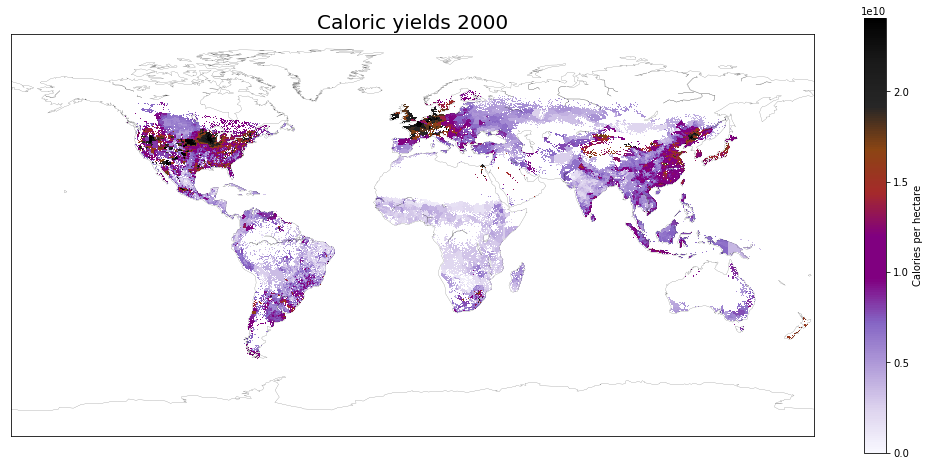

In [35]:
original_df = pd.read_csv(data_2000_path + 'baseline_df.csv', index_col='pixel_id', na_values=[-9999])
original_df['calories_per_ha'] = original_df['log_calories_per_ha'].apply(lambda x: np.exp(x))

fig, ax = plt.subplots(figsize=(18, 8))

min_val = original_df['calories_per_ha'].min()

# Limit to 0.995 quantile for visualization purpose
max_val = original_df['calories_per_ha'].quantile(0.995)
print(min_val, max_val)

title = 'Caloric yields 2000'
visualize_predictions(original_df['calories_per_ha'], '2000', 0, max_val, fig, ax, title, shape=(2160, 4320), savefig=False)

### Visualize the yield changes between 2000 and 2050

In [11]:
def customColorMap(cmap, vmin, vmax, resize=False, name='blabla'):
    '''Charlie's function to re-center and re-size colormap'''
    
    midpoint= 1 - vmax / (vmax + abs(vmin)) 
    
    if resize!=False: 
        start=resize[0]
        stop =resize[1]
        ### Could do directly with quantiles e.g  start = 1 / (serie.quantile(0.1) / serie.min() )
        ### And stop =  1 / (serie.quantile(0.9) / serie.max() )
    else:
        start = 0
        stop  = 1
    
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)
    
    return newcmap

In [12]:
def visualize_changes(caloric_yield, scenario, min_val, max_val, fig, ax, title, shape=(2160, 4320), savefig=False):
    
    # Set values to 
    yield_array = np.zeros((shape[0]*shape[1],)) - 9999
    yield_array[caloric_yield.index] = caloric_yield.values
    yield_df = pd.DataFrame(yield_array, columns=['label'])
    
    yield_df.replace(0, -9999)
    
    
    data = yield_df.values
    data = np.ma.masked_where(data == np.inf, data)
    
    raw_cmap =  plt.get_cmap('PiYG')
    cmap = customColorMap(raw_cmap, min_val, max_val, resize=[0, 1])
    
    
    cmap.set_under('white')
    cmap.set_over('green')
    cmap.set_bad('#0d98ba')
    
    new_crops = mpatches.Patch(color='#0d98ba', label='New cropland')
    
    #Plot data
    bm = Basemap()
    
    im = bm.imshow(np.flipud(data.reshape(shape)), cmap=cmap, vmin=min_val, vmax=max_val, ax=ax)
    
    bm.drawcoastlines(linewidth=0.15, color='0.1', ax=ax)
        
    ax.set_title(title, fontsize=20)
    cb = fig.colorbar(im, ax=ax)
    cb.set_label('Yield difference (%)')
    plt.legend(handles=[new_crops])

/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


-46.761804623278664 168.66418606607897


/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


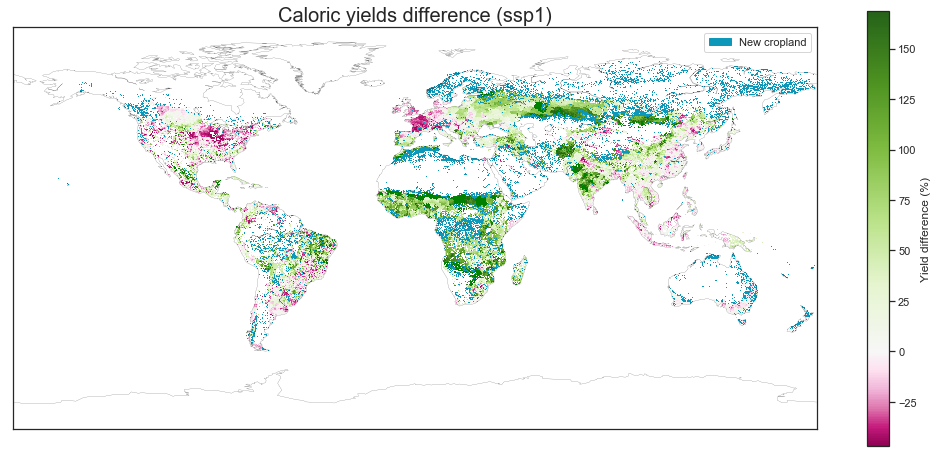

-49.321421889318955 166.5630194645708


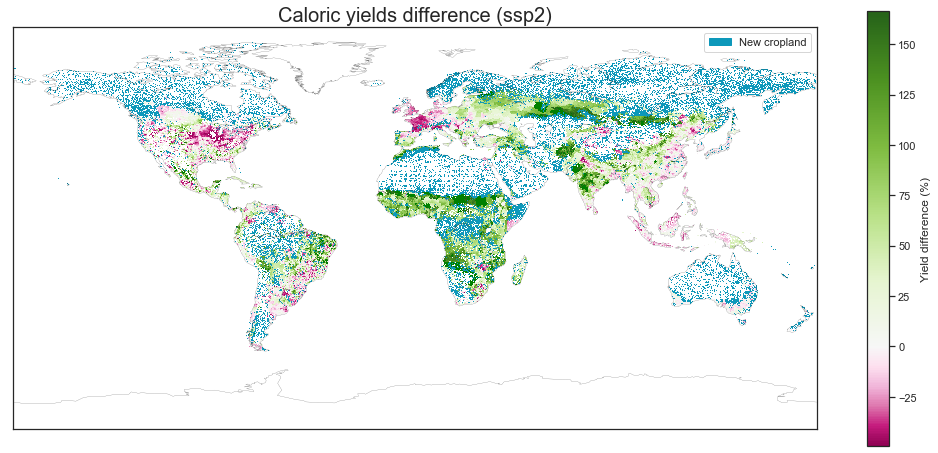

-48.55412766071424 157.20446469496633


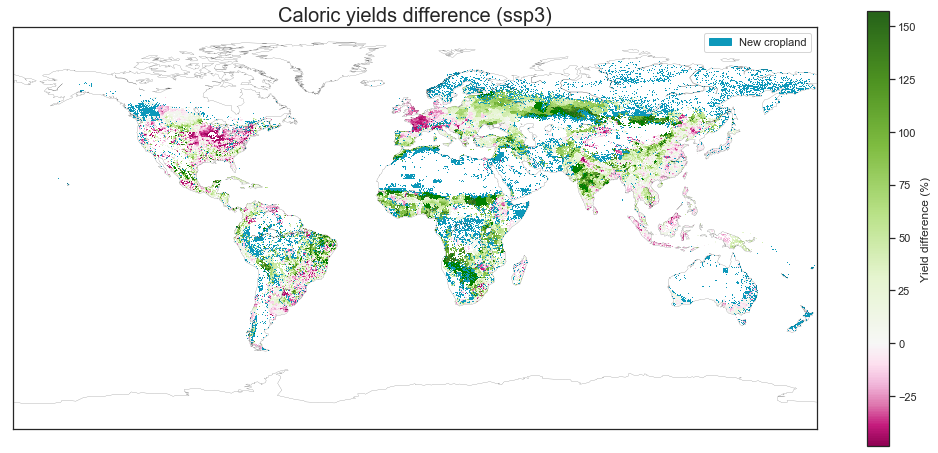

-48.87182873027636 153.24150894440257


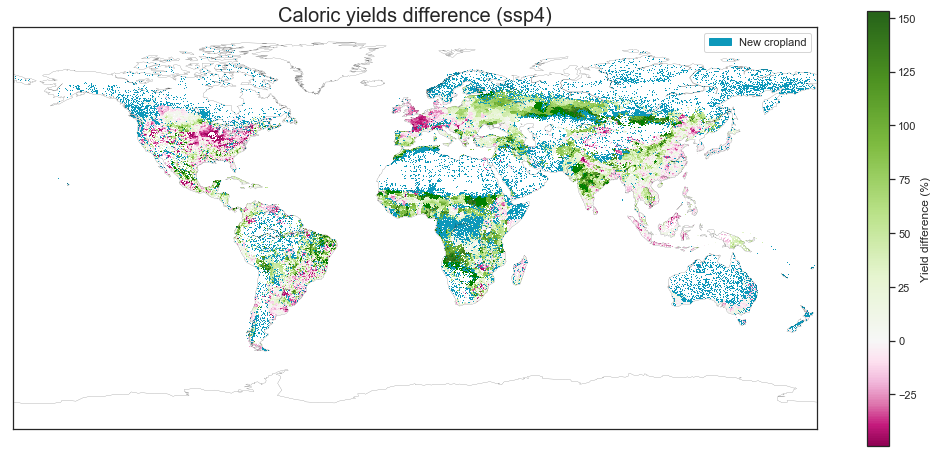

-50.92748373765433 176.81103356163248


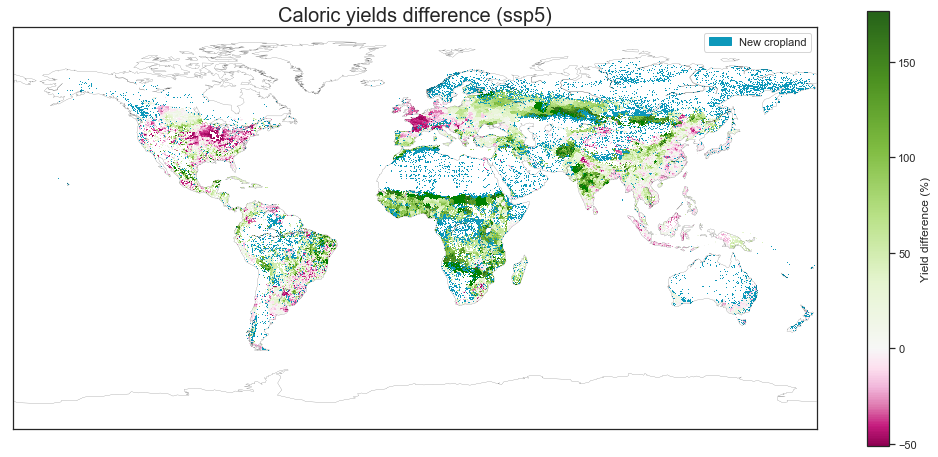

In [172]:
for ssp in climate_scenarios:
    df = pd.read_csv(compare_path + '{}_compare_new.csv'.format(ssp), index_col='pixel_id', na_values=[-9999]).dropna(subset=['cal_per_ha_pred'])
    diff = 100*df['%delta_cal_per_ha']

    fig, ax = plt.subplots(figsize=(18, 8))
    
    min_val = diff.quantile(0.005)
    max_val = diff.quantile(0.95)
    print(min_val, max_val)
        
    title = 'Caloric yields difference ({})'.format(ssp)
    visualize_changes(diff, ssp, min_val, max_val, fig, ax, title)
    plt.show()

ssp1
ssp2
ssp3
ssp4
ssp5
-100.0 128.91717663661933
ssp1
ssp2
ssp3
ssp4
ssp5


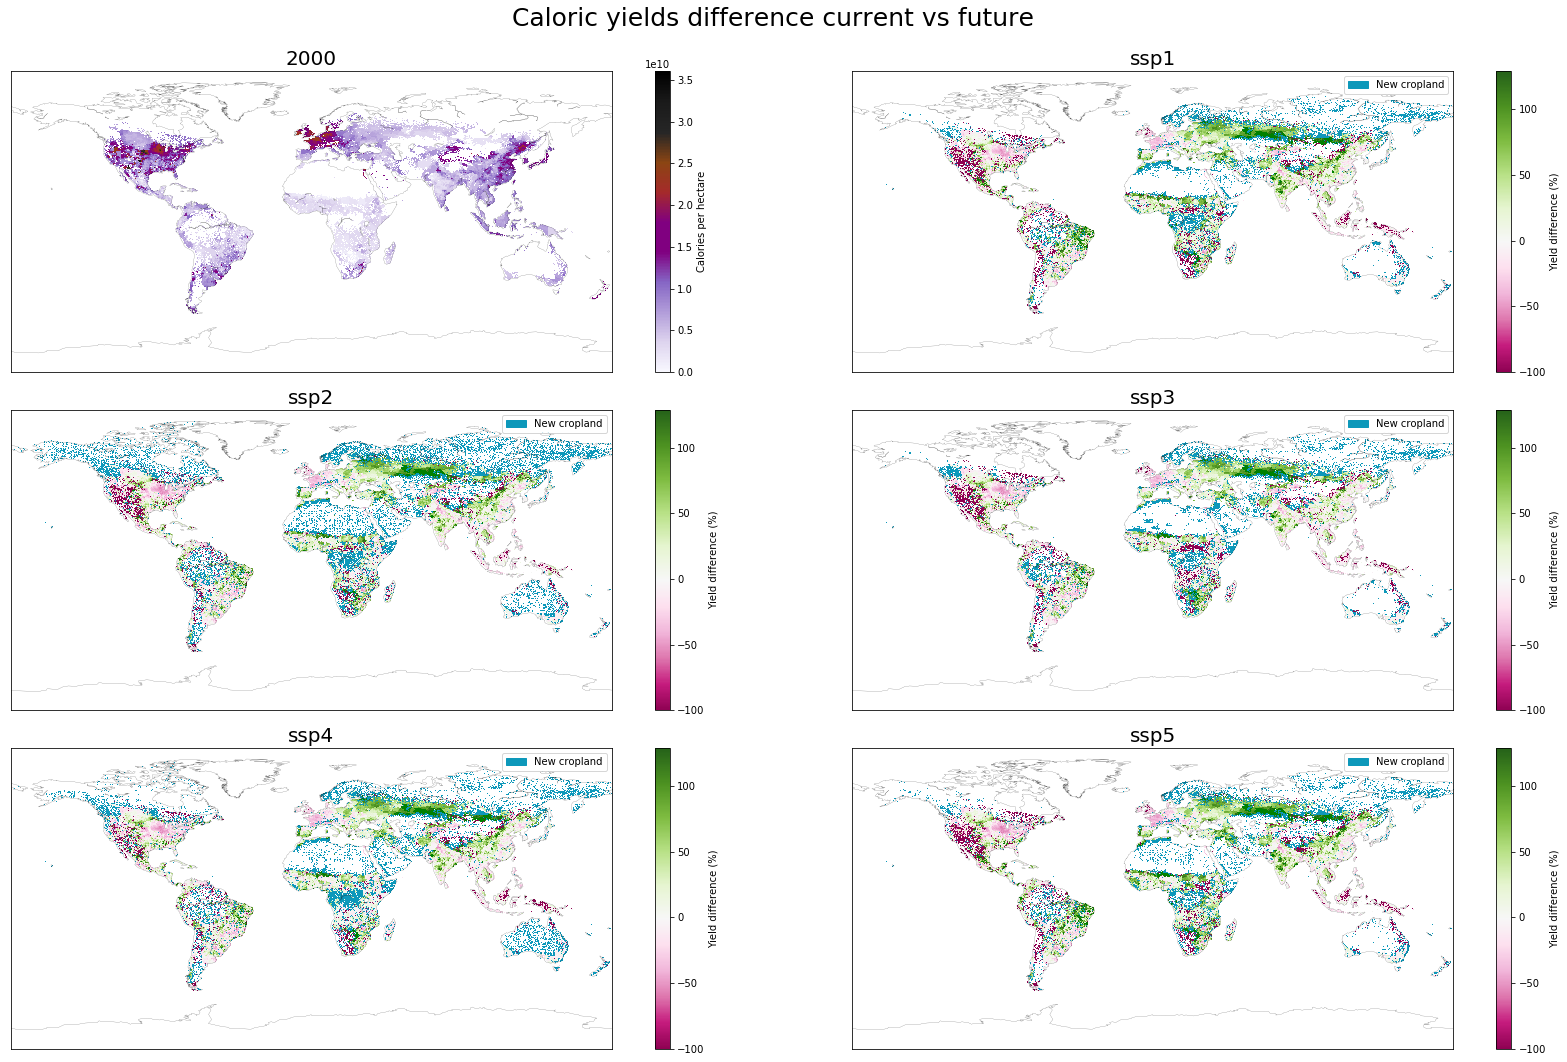

In [13]:
fig = plt.figure(figsize=(24, 15))
fig.suptitle('Caloric yields difference current vs future', fontsize=25)

ax = plt.subplot(321)


min_val, max_val = 0, 0

for ssp in climate_scenarios:
    print(ssp)
    df = pd.read_csv(compare_path + '{}_compare_new.csv'.format(ssp), index_col='pixel_id', na_values=[-9999]).dropna(subset=['cal_per_ha_pred'])
    diff = 100*df['%delta_cal_per_ha']
    min_val = min(min_val, diff.quantile(0.005))
    max_val = max(max_val, diff.quantile(0.95))

print(min_val, max_val)

title = '2000'
df = pd.read_csv(compare_path + '{}_compare_new.csv'.format('ssp1'), index_col='pixel_id', na_values=[-9999])
cal_2000 = df['cal_per_ha_2000']
visualize_predictions(cal_2000, '2000', 0, cal_2000.max(), fig, ax, title, savefig=False)

for i, ssp in enumerate(climate_scenarios): 
    print(ssp)
    df = pd.read_csv(compare_path + '{}_compare_new.csv'.format(ssp), index_col='pixel_id', na_values=[-9999]).dropna(subset=['cal_per_ha_pred'])
    diff = 100*df['%delta_cal_per_ha']

    ax = plt.subplot(321 + i + 1)

    title = ssp
    visualize_changes(diff, ssp, min_val, max_val, fig, ax, title, savefig=False)
    

fig.tight_layout(rect=[0, 0, 1, 0.95])

### Visualize average change

In [9]:
for ssp in climate_scenarios:
    df = pd.read_csv(compare_path + '{}_compare_new.csv'.format(ssp), index_col='pixel_id', na_values=[-9999])
    if ssp == 'ssp1':
        new_df = df[['cal_per_ha_2000', 'cal_per_ha_pred']].rename({'cal_per_ha_pred': ssp}, axis=1)
    else:
        data = df['cal_per_ha_pred']
        data.name = ssp
        new_df = pd.concat([new_df, data], axis=1)

new_df = new_df.dropna(how='all').fillna(0)
new_df['2050_mean'] = new_df[climate_scenarios].mean(axis=1, skipna=True)

new_pts = list(new_df[new_df['cal_per_ha_2000'] == 0].index)
new_crops = new_df.loc[new_df.index.isin(new_pts), climate_scenarios].astype(bool).sum(axis=1)

new_df['new_crops_count'] = new_crops
new_df['change'] = (new_df['2050_mean'] - new_df['cal_per_ha_2000']) / new_df['cal_per_ha_2000']
new_df['change'] = new_df['change'].replace(np.inf, np.nan).fillna(-10 * new_df['new_crops_count'])

/Users/Romain/anaconda3/envs/food_sufficiency/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
def visualize_changes_mean(caloric_yield, scenario, min_val, max_val, fig, ax, title, shape=(2160, 4320), savefig=False):
    
    # Set values to 
    yield_array = np.zeros((shape[0]*shape[1],)) - 9999
    yield_array[caloric_yield.index] = caloric_yield.values
    yield_df = pd.DataFrame(yield_array, columns=['label'])
    
    yield_df.replace(0, -9999)
    
    
    data = yield_df.values
    data = np.ma.masked_where(data == np.inf, data)
    
    #cmap = cm.coolwarm_r
    #cmap = colors.LinearSegmentedColormap.from_list('list', ['mediumvioletred', 'hotpink', 'white', 'palegreen', 'green'], N=20, gamma=0.2)
    raw_cmap =  plt.get_cmap('PiYG')
    cmap = customColorMap(raw_cmap, min_val, max_val, resize=[0, 1])
    
    
    cmap.set_under('white')
    cmap.set_over('green')
    cmap.set_bad('#0d98ba')
    
    
    #Plot data
    bm = Basemap()
    
    im = bm.imshow(np.flipud(data.reshape(shape)), cmap=cmap, vmin=min_val, vmax=max_val, ax=ax)
    
    cmap_2 = colors.ListedColormap(['lightskyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'blue'])
    cmap_2.set_bad('#000000', alpha=0)
    
    # Set values to 
    yield_array = np.zeros((shape[0]*shape[1],)) - 9999
    yield_array[caloric_yield[caloric_yield < -100].index] = caloric_yield[caloric_yield < -100].values
    yield_df = pd.DataFrame(yield_array, columns=['label'])
    
    #yield_df.replace(0, -9999)
    
    data = yield_df.values
    data = np.ma.masked_where(data == -9999, data)
    im2 = bm.imshow(np.flipud(-data.reshape(shape)), cmap=cmap_2, ax=ax)
    
    bm.drawcoastlines(linewidth=0.15, color='0.1', ax=ax)
        
    ax.set_title(title, fontsize=20)
    cb = fig.colorbar(im, ax=ax)
    cb2 = fig.colorbar(im2, ax=ax)
    cb.set_label('Yield difference (%)')
    #plt.legend(handles=[new_crops])

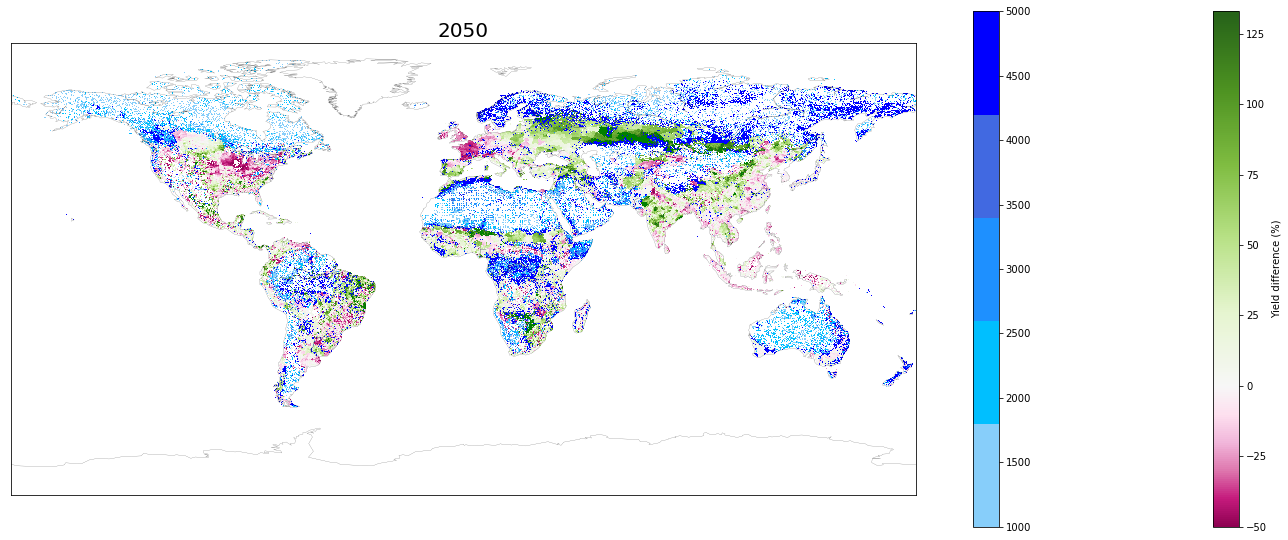

In [21]:
fig = plt.figure(figsize=(20, 8))

ax = plt.subplot()
title = '2050'
visualize_changes_mean(100*new_df['change'], ssp, -50, 133, fig, ax, title, savefig=False)
    

fig.tight_layout(rect=[0, 0, 1, 0.95])

## Sensitivity to different features

Interesting columns: Annual Mean Temperature, Irrig, Isothermality, Min Temperature of Coldest Month, Precipitation Seasonality, Temperature Annual Range 

Annual Mean Temperature
ssp1
ssp2
ssp3
ssp4
ssp5
Mean Diurnal Range
ssp1
ssp2
ssp3
ssp4
ssp5
Temperature Seasonality
ssp1
ssp2
ssp3
ssp4
ssp5
Isothermality
ssp1
ssp2
ssp3
ssp4
ssp5
Precipitation Seasonality
ssp1
ssp2
ssp3


/Users/Romain/anaconda3/envs/food_sufficiency/lib/python3.8/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/Users/Romain/anaconda3/envs/food_sufficiency/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ssp4
ssp5


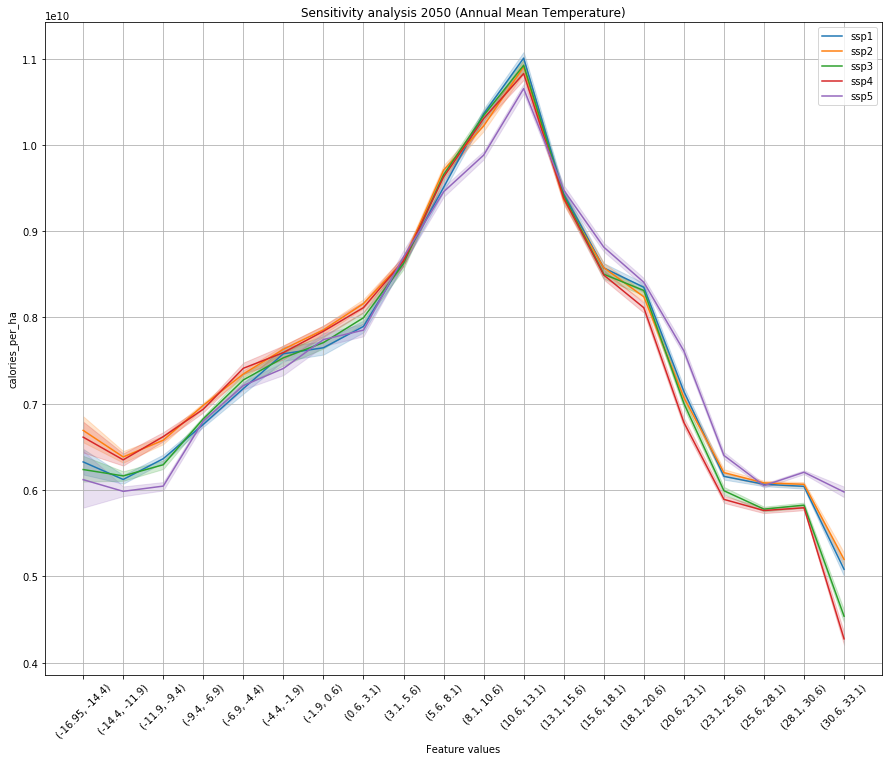

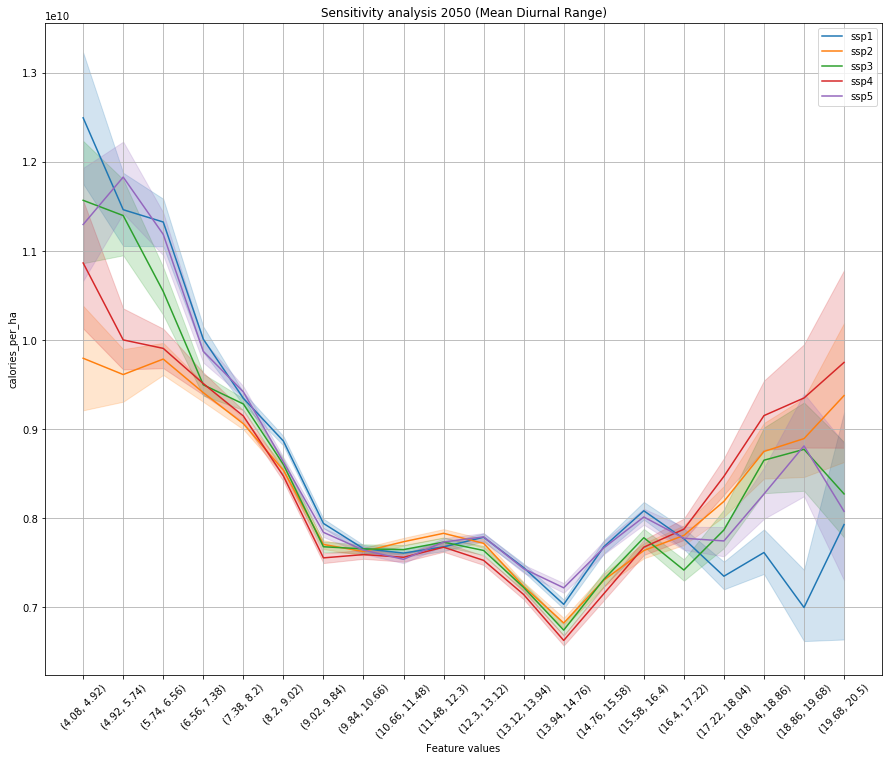

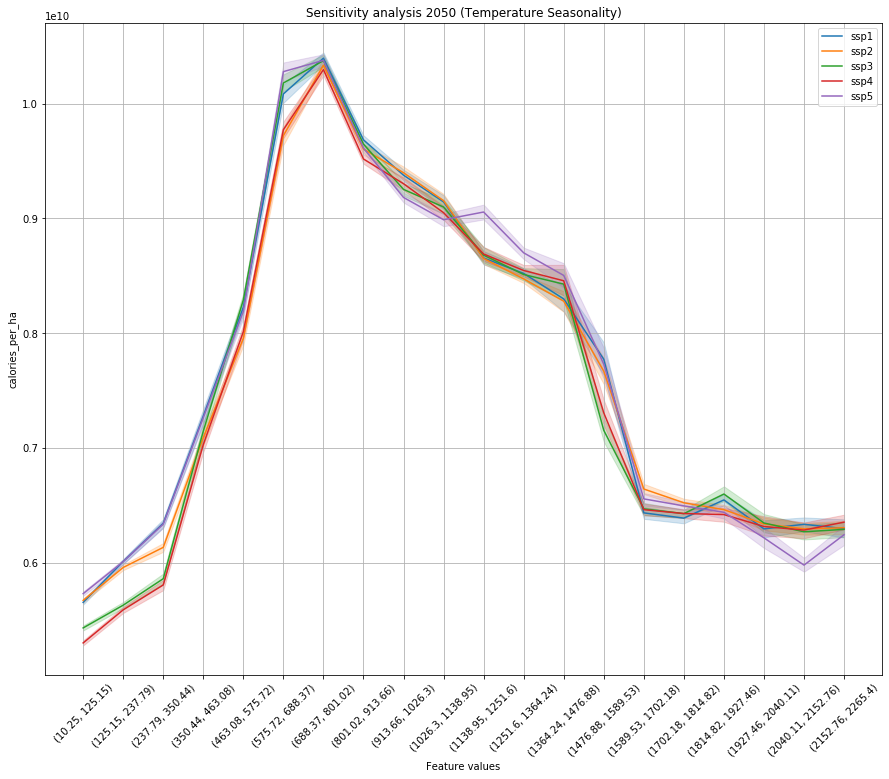

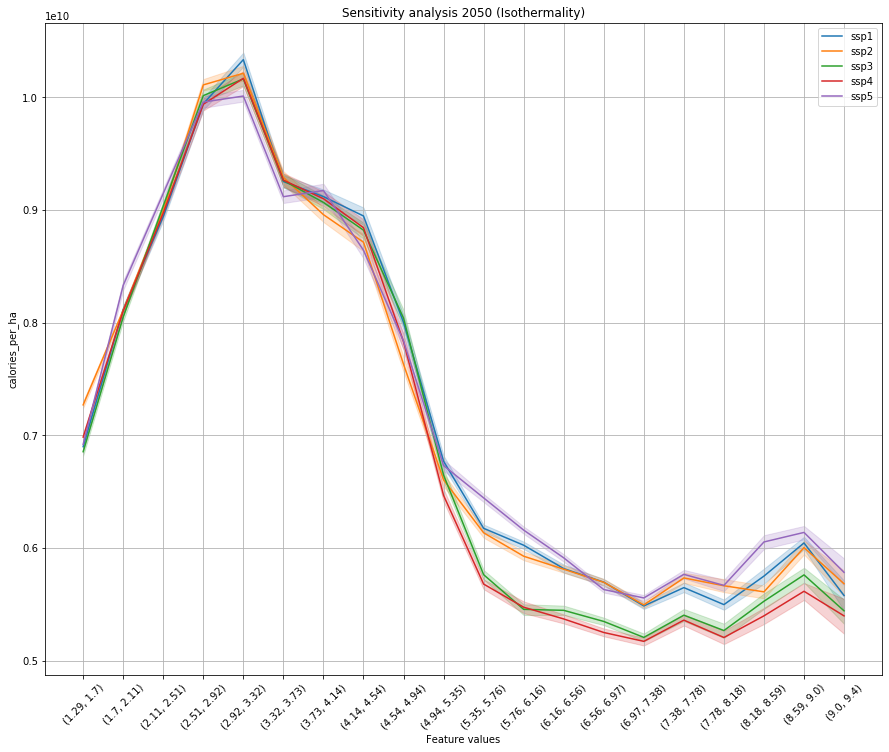

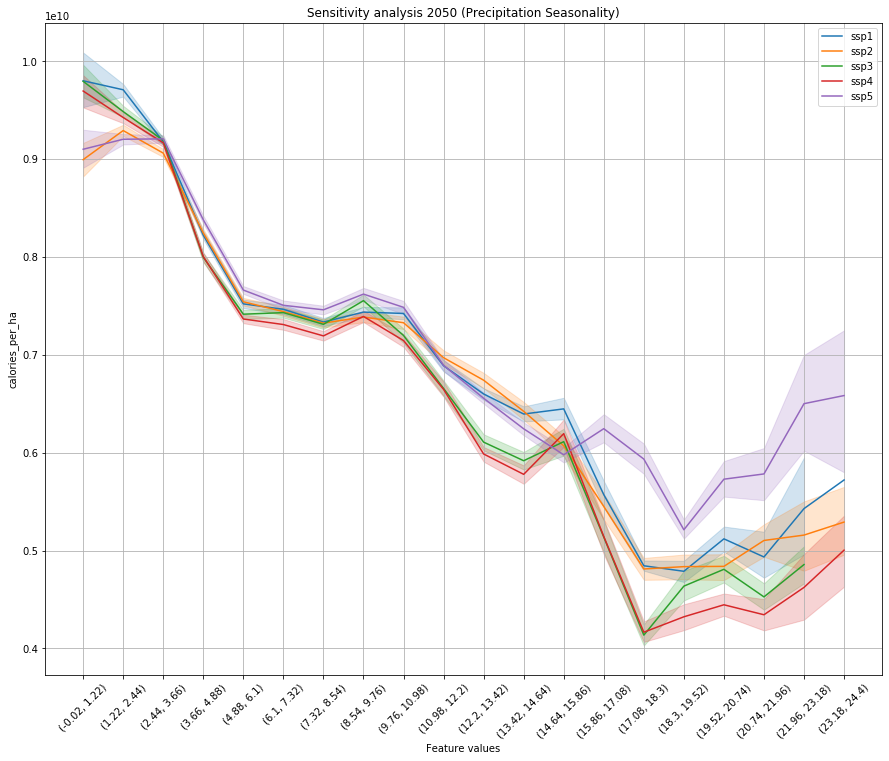

In [26]:
n_bins = 20
feature = ['Annual Mean Temperature']
features = ['Annual Mean Temperature', 'Mean Diurnal Range', 
            'Temperature Seasonality', 'Isothermality', 'Precipitation Seasonality']

for feature in features:
    print(feature)
    plt.figure(figsize=(15, 12))    
    for ssp in climate_scenarios:
        print(ssp)
        to_plot = pd.DataFrame()
        for climate_model in climate_models:
            df = pd.read_csv(model_output_path + '{}_{}_2050.csv'.format(climate_model, ssp), index_col='pixel_id', na_values=[-9999])

            original_values = pd.read_csv(data_2050_gdp_stat_path + '{}_{}_gdp_cat_new.csv'.format(climate_model, ssp), index_col='pixel_id', na_values=[-9999])
            sample = original_values.sample(n=100000)
            output = df.loc[sample.index, 'calories_per_ha'].rename('calories_per_ha')
            try:
                if ssp == 'ssp1':
                    sample_bin, bins = pd.cut(sample[feature], n_bins, retbins=True, labels=range(n_bins))
                else: 
                    sample_bin = pd.cut(sample[feature], bins, labels=range(n_bins))

                data = pd.concat([sample_bin.rename(feature), output], axis=1)
                to_plot = to_plot.append(data)

            except Exception as e:
                print(feature)
                print(e)
                pass
        sns.lineplot(x=feature, y='calories_per_ha', data=data, label=ssp)

    plt.xlabel('Feature values')
    bins = [round(b/10, 2) for b in bins]
    tick_lab = zip(bins[:-1], bins[1:])
    plt.xticks(range(n_bins), tick_lab, rotation=45)
    plt.grid(True)
    plt.title(f'Sensitivity analysis 2050 ({feature})')
    plt.legend()